<a href="https://colab.research.google.com/github/ayushiraj02/Training/blob/Week_02_Simple_Linear_Regression/Assi_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions used in the code

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f

hypothesis testing for the regression coefficients

In [ ]:
def hypothesis_testing_regression(x, y, b1, res_square):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis :       β1 = 0 (No effect on dependent variable)")
    print("Alternate Hypothesis :  β1 ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    Sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", Sum_of_residual_sq)

    mean = np.mean(x)
    Mse = Sum_of_residual_sq / (n - 2)
    print("Mean of x =", mean)
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    s = (x - mean) ** 2
    a = s.sum()
    b = np.sqrt(a)
    Sb1 = np.sqrt(Mse) / b

    # Step 4: Calculate a test statistic
    print("4. Step 4")
    t_Statistics = b1 / ((np.sqrt(Mse)) / b)
    print("The value of t-statistics =", t_Statistics)

    # Step 5: Construct Acceptance / Rejection regions
    print("5. Step 5")
    # Degrees of freedom
    df = n - 2

    # Calculate p-value
    p_value = 2 * (1 - t.cdf(abs(t_Statistics), df))
    print("p-value:", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    print("6. Step 6")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis")

# Example usage
# x =  Independent variable
# y = np.array([10, 12, 14, 16, 18])   # Dependent variable
#b1 = 1.5
#res_square = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

#hpothesis_testing_regression(x, y, b1, res_square)


hypothesis testing for the overall model(Omnibus test)

In [ ]:
def omnibus_test_regression(x, y, res_square, k):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)")
    print("Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    Sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", Sum_of_residual_sq)

    mean = np.mean(x)
    Mse = Sum_of_residual_sq / (n - k - 1)
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    s = (x - mean) ** 2
    a = s.sum()
    b = np.sqrt(a)

    # Step 4: Calculate the F-statistic
    print("4. Step 4")
    SSR = np.sum((y - np.mean(y)) ** 2) - Sum_of_residual_sq
    MSR = SSR / k
    F_statistic = MSR / Mse
    print("The value of F-statistic =", F_statistic)

    # Step 5: Construct Acceptance / Rejection regions
    print("5. Step 5")
    # Degrees of freedom
    df1 = k
    df2 = n - k - 1

    # Calculate p-value
    p_value = 1 - f.cdf(F_statistic, df1, df2)
    print("p-value:", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    print("6. Step 6")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis")

# # Example usage
# x = np.array([20, 22, 24, 26, 28])  # Independent variable
# y = np.array([10, 12, 14, 16, 18])   # Dependent variable
# res_square = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
# k = 1  # Number of independent variables

# omnibus_test_regression(x, y, res_square, k)


# ANOVA

In [ ]:
def calculate_anova_parameters(y, y_pred):
    n = len(y)
    p =  1 # Assuming simple linear regression for demonstration

    # Calculate sum of squares
    y_mean = np.mean(y)
    sum_sq_total = np.sum((y - y_mean) ** 2)
    sum_sq_model = np.sum((y_pred - y_mean) ** 2)
    sum_sq_res = np.sum((y - y_pred) ** 2)

    return p, n, sum_sq_model, sum_sq_res, sum_sq_total

def print_anova_table(y, y_pred):
    p, n, sum_sq_model, sum_sq_res, sum_sq_total = calculate_anova_parameters(y, y_pred)

    df_model = p
    df_residual = n - p - 1
    df_total = n - 1

    mean_sq_model = sum_sq_model / df_model
    mean_sq_res = sum_sq_res / df_residual

    f_value = mean_sq_model / mean_sq_res
    p_value_model = 1 - f.cdf(f_value, df_model, df_residual)
    r_squared_model = sum_sq_model / sum_sq_total

    print("=================================================================================")
    print("{:^80}".format("ANOVA Table"))
    print("=================================================================================")
    print("{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}".format("Source", "df", "sum_sq", "mean_sq", "F", "PR(>F)"))
    print("-------------------------------------------------------------------------------")
    print("{:<15}{:<15.0f}{:<15.4f}{:<15.4f}{:<15.4f}{:<15.4f}".format("Model", df_model, sum_sq_model, mean_sq_model, f_value, p_value_model))
    print("{:<15}{:<15.0f}{:<15.4f}{:<15.4f}".format("Residual", df_residual, sum_sq_res, mean_sq_res))
    print("{:<15}{:<15.0f}{:<15.4f}".format("Total", df_total, sum_sq_total))
    print("-------------------------------------------------------------------------------")
    print("{:<15}{:<15.4f}".format("R-squared", r_squared_model))
    print("=================================================================================")

# # Example usage
# import numpy as np
# from scipy.stats import f

# # Sample data
# y = np.array([10, 12, 14, 16, 18])
# y_pred = np.array([9, 11, 14, 15, 19])  # Example predicted values

# # Print ANOVA table
# print_anova_table(y, y_pred)


# 1. Given the variables in this dataset, which variables can be considered explanatory (X) and which considered response (Y)?  Can any variables take on both roles?   Make a table that summarizes your conclusions.





In [ ]:
df=pd.read_excel('/content/drive/MyDrive/USStates.xlsx')
df

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,30.7,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,33.1,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,20.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,21.7,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,37.7,6.4,65.3,79.7
5,Colorado,W,5.356,58.433,89.5,37.0,17.7,60.4,21.3,15.8,6.7,69.9,80.0
6,Connecticut,NE,3.597,69.461,91.0,39.8,15.5,50.9,25.0,22.1,6.3,67.0,87.7
7,Delaware,NE,0.936,59.878,86.9,31.7,19.6,49.7,31.1,30.0,6.6,60.4,85.7
8,Florida,S,19.893,46.956,87.1,26.5,16.8,50.2,26.4,23.7,7.2,60.2,70.9
9,Georgia,S,10.097,49.179,85.3,29.0,18.8,50.8,30.3,39.4,4.7,60.3,72.7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Region            50 non-null     object 
 2   Population        50 non-null     float64
 3   HouseholdIncome   50 non-null     float64
 4   HighSchool        50 non-null     float64
 5   College           50 non-null     float64
 6   Smokers           50 non-null     float64
 7   PhysicalActivity  50 non-null     float64
 8   Obese             50 non-null     float64
 9   NonWhite          50 non-null     float64
 10  HeavyDrinkers     50 non-null     float64
 11  TwoParents        50 non-null     float64
 12  Insured           50 non-null     float64
dtypes: float64(11), object(2)
memory usage: 5.2+ KB


In [ ]:
df.columns

Index(['State', 'Region', 'Population', 'HouseholdIncome', 'HighSchool',
       'College', 'Smokers', 'PhysicalActivity', 'Obese', 'NonWhite',
       'HeavyDrinkers', 'TwoParents', 'Insured'],
      dtype='object')

In [ ]:
# Define the data
variables = {
    'Target variable': ['HouseholdIncome','Insured'],
    'Both target and predictor variable': ['Obese', 'HouseholdIncome','Smokers','HeavyDrinkers'],
    'Predictors': ['State', 'Region', 'Population', 'HighSchool', 'College',
                   'PhysicalActivity', 'NonWhite', 'TwoParents', 'Insured']
}

# Find the maximum length of arrays
max_length = max(len(value) for value in variables.values())

# Pad shorter arrays with None
variables_padded = {key: value + ['#'] * (max_length - len(value)) for key, value in variables.items()}

# Create a DataFrame
variable_data = pd.DataFrame(variables_padded)

# Create an interactive table using Plotly
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Table(
        header=dict(values=list(variable_data.columns)),
        cells=dict(values=[variable_data[col] for col in variable_data.columns])
    )
)

fig.update_layout(
    title="Role of Variables",
    height=400
)

fig.show()

# 1. What is the population of interest for this problem (yes – this is a trick question!)?  Be sure your answer is clear and complete.






In [ ]:
df.head()

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,30.7,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,33.1,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,20.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,21.7,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,37.7,6.4,65.3,79.7


In [ ]:
df['Smokers'].max()

27.3

In [ ]:
df.columns

Index(['State', 'Region', 'Population', 'HouseholdIncome', 'HighSchool',
       'College', 'Smokers', 'PhysicalActivity', 'Obese', 'NonWhite',
       'HeavyDrinkers', 'TwoParents', 'Insured'],
      dtype='object')

In [ ]:
data=df[['State', 'Region', 'Population', 'HouseholdIncome', 'HighSchool',
       'College', 'Smokers','PhysicalActivity', 'Obese','HeavyDrinkers','TwoParents','Insured']]

In [ ]:
data

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,6.4,65.3,79.7
5,Colorado,W,5.356,58.433,89.5,37.0,17.7,60.4,21.3,6.7,69.9,80.0
6,Connecticut,NE,3.597,69.461,91.0,39.8,15.5,50.9,25.0,6.3,67.0,87.7
7,Delaware,NE,0.936,59.878,86.9,31.7,19.6,49.7,31.1,6.6,60.4,85.7
8,Florida,S,19.893,46.956,87.1,26.5,16.8,50.2,26.4,7.2,60.2,70.9
9,Georgia,S,10.097,49.179,85.3,29.0,18.8,50.8,30.3,4.7,60.3,72.7


# 3. For the duration of this assignment, let’s have HOUSEHOLDINCOME be the response variable (Y).  Also, consider the STATE, REGION and POPULATION variables to be demographic variables.  Obtain basic summary statistics (i.e. n, mean, std dev.) for each variable.  Report these in a table.  Then, obtain all possible scatterplots relating the non-demographic explanatory variables (Xs) to the response variable (Y).  

In [ ]:
data.describe()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,HeavyDrinkers,TwoParents,Insured
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,6.36394,53.284280,89.320000,30.830000,19.316000,50.734000,28.766000,6.046000,65.52400,80.148000
std,7.15096,8.690234,3.107135,6.078643,3.523122,5.509643,3.369286,1.175292,5.17074,5.494087
min,0.58400,39.031000,83.800000,21.100000,10.300000,37.400000,21.300000,3.300000,52.30000,67.300000
25%,1.85800,46.814250,87.100000,25.900000,16.650000,47.650000,26.400000,5.200000,62.70000,76.150000
50%,4.53150,51.757500,89.700000,30.150000,19.050000,50.650000,29.400000,6.150000,65.45000,79.900000
75%,6.98275,58.724000,91.625000,35.250000,21.475000,54.125000,31.075000,6.775000,69.50000,84.475000
max,38.80300,73.538000,95.400000,48.300000,27.300000,64.100000,35.100000,8.600000,80.60000,92.800000


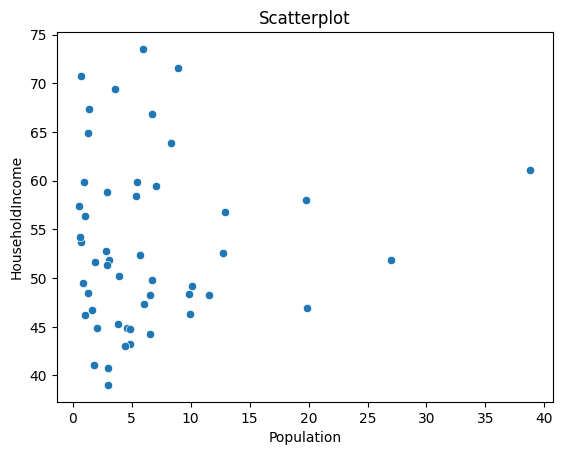

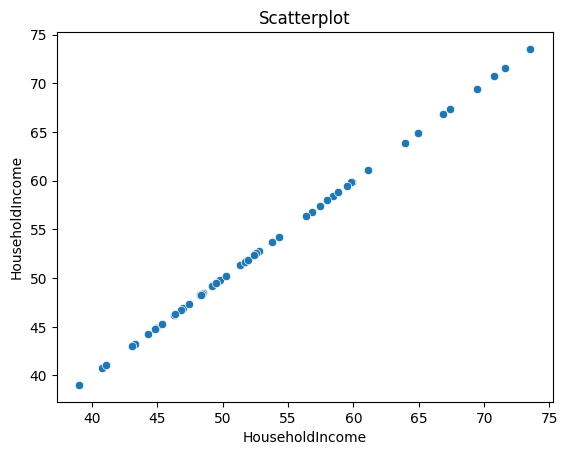

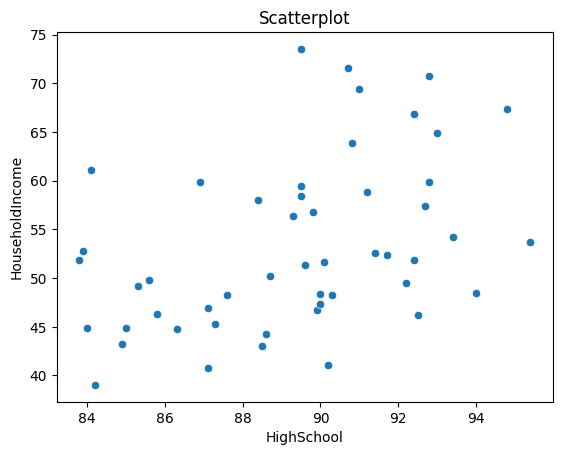

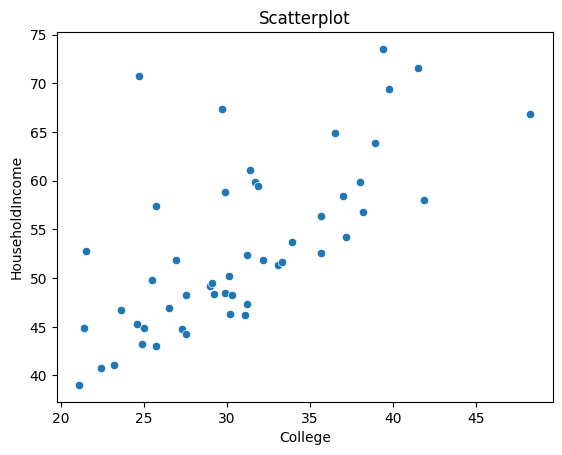

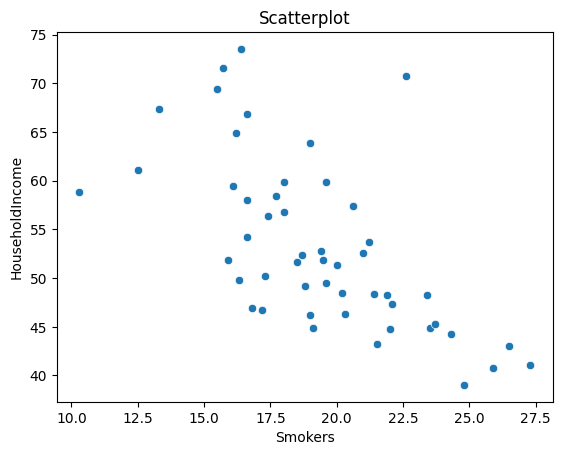

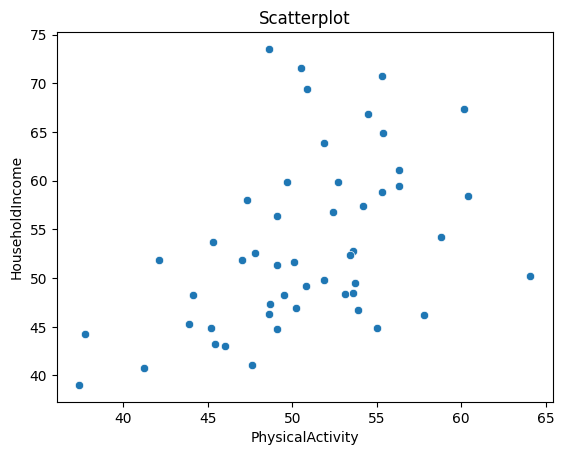

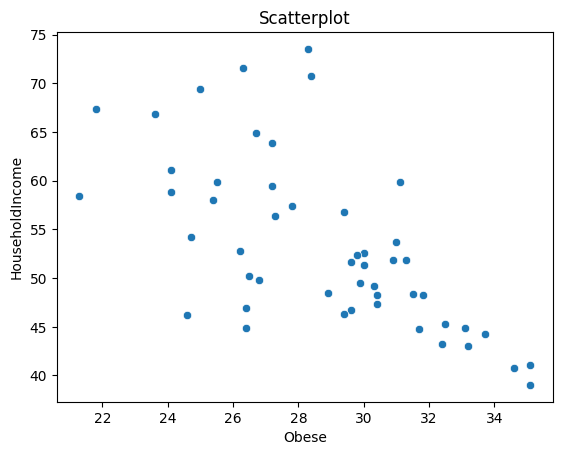

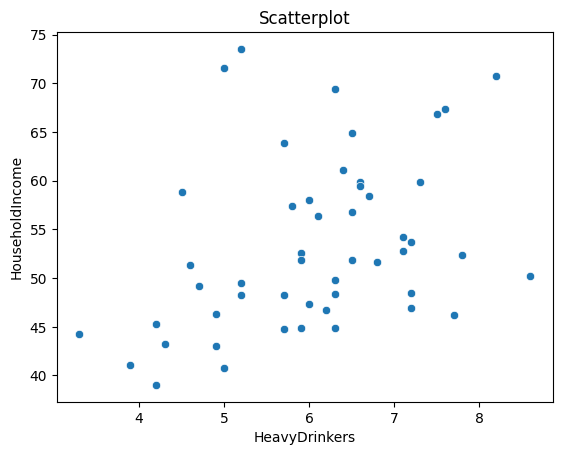

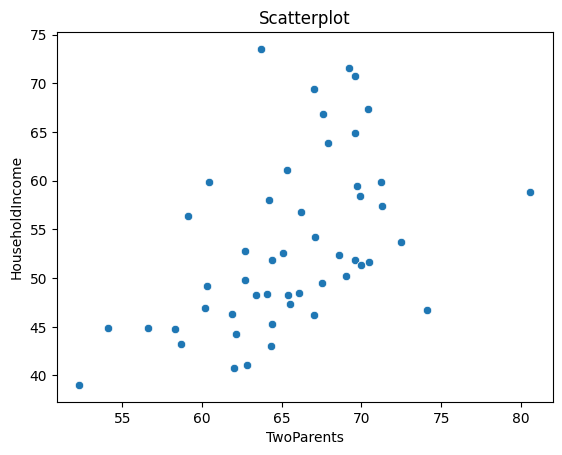

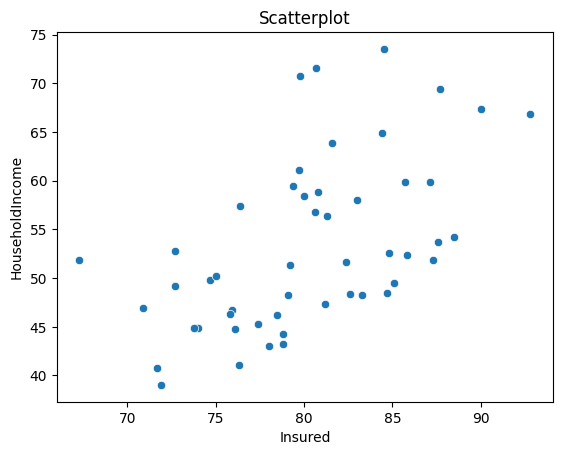

In [ ]:
for i in data.select_dtypes(include =['int','float']).columns:
  x = df[i]
  y = df['HouseholdIncome']

  sns.scatterplot(x=x, y=y)

  plt.xlabel(f'{i}')
  plt.ylabel('HouseholdIncome')
  plt.title('Scatterplot')
  plt.show()

# 4. Obtain all possible pairwise Pearson Product Moment correlations of the non-demographic variables with the response variable Y and report the correlations in a table.  Given the scatterplots from step 3) and these correlation coefficients, is simple linear regression an appropriate analytical method for this data?   Why or why not?

In [ ]:
data.select_dtypes(include =['int','float']).corr()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,HeavyDrinkers,TwoParents,Insured
Population,1.000000,0.073738,-0.415579,0.140484,-0.298556,-0.098948,-0.126101,-0.030975,-0.145244,-0.225785
HouseholdIncome,0.073738,1.000000,0.430845,0.685591,-0.637522,0.440417,-0.649112,0.373014,0.477644,0.549679
HighSchool,-0.415579,0.430845,1.000000,0.480685,-0.150125,0.382559,-0.301334,0.386470,0.697022,0.751874
College,0.140484,0.685591,0.480685,1.000000,-0.485522,0.267362,-0.519045,0.264925,0.365850,0.697235
Smokers,-0.298556,-0.637522,-0.150125,-0.485522,1.000000,-0.590243,0.814867,-0.390434,-0.475431,-0.272492
PhysicalActivity,-0.098948,0.440417,0.382559,0.267362,-0.590243,1.000000,-0.780685,0.664022,0.495817,0.297089
Obese,-0.126101,-0.649112,-0.301334,-0.519045,0.814867,-0.780685,1.000000,-0.555064,-0.459993,-0.351116
HeavyDrinkers,-0.030975,0.373014,0.386470,0.264925,-0.390434,0.664022,-0.555064,1.000000,0.304604,0.331003
TwoParents,-0.145244,0.477644,0.697022,0.365850,-0.475431,0.495817,-0.459993,0.304604,1.000000,0.449379
Insured,-0.225785,0.549679,0.751874,0.697235,-0.272492,0.297089,-0.351116,0.331003,0.449379,1.000000


# 5. Fit a simple linear regression model to predict Y using the COLLEGE explanatory variable.  Use the base STAT lm(Y~X) function.  Why would you want to start with this explanatory variable?   Call this Model 1.   Report the prediction equation for Model 1 and interpret each coefficient of the model in the context of this problem.  In addition, report and interpret the R-squared statistic for Model 1.

In [ ]:
# Define the predictor variables (X) and the response variable (Y)
X = data['College']  # Add all your predictor variables here
Y = data['HouseholdIncome']  # Response variable
                                                             #I want to start with it because it has the highest correlation with the target variable that i have assumed
# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.94e-08
Time:                        04:50:14   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0664      4.719      4.888      0.0

In [ ]:
from scipy.stats import t
# Get the degrees of freedom
deg= model.df_resid

# Define the significance level (alpha)
alpha = 0.05 # For example, for a 95% confidence level

# Calculate the critical value for the t-distribution
t_critical = t.ppf(1 - alpha / 2, deg)

print("Critical value for t-distribution (two-tailed test) with alpha =", alpha, "and degrees of freedom (df) =", deg, "is:", t_critical)

Critical value for t-distribution (two-tailed test) with alpha = 0.05 and degrees of freedom (df) = 48.0 is: 2.0106347546964454


In [ ]:
# regression equation
# Extract the coefficients
intercept = model.params['const']
slope = model.params['College']

# Print the prediction equation
print(f"Prediction equation: Y = {intercept:.2f} + {slope:.2f} * College")

Prediction equation: Y = 23.07 + 0.98 * College


# 6.From your Model 1 results for task 5) – Specify the null and alternative hypothesis separately for each of the two parameters in the model.  Report and interpret the results of the T-tests for these hypotheses.  In addition, state the null and alternative hypotheses for the omnibus (i.e. overall) model.   Report the ANOVA table and interpret the results of the F-test.

In [ ]:
# Extract the required features from the dataset
college = data['College']
actual_values = data['HouseholdIncome']

# Coefficients from the provided regression equation
b0 = 23.07     #Y = 23.07 + 0.98 * X
b1 = 0.9801

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1*college

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals**2
sst= (actual_values - np.mean(data['HouseholdIncome']))**2
ssr = (predicted_values - np.mean(data['HouseholdIncome']))**2

s = (college - np.mean(college))**2

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals,'Res_square':res_square, 'SST':sst, 'SSR': ssr})

# Print the actual, predicted, and residual values
#print("Actual vs Predicted:")


In [ ]:
hypothesis_testing_regression(data['College'],data['HouseholdIncome'],0.9801,res_square)

1. Step 1
Null Hypothesis :       β1 = 0 (No effect on dependent variable)
Alternate Hypothesis :  β1 ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 1961.1297578699002
Mean of x = 30.83
Mean Squared Error (MSE) = 40.85686995562292
Root Mean Squared Error (RMSE) = 6.391937887340812
4. Step 4
The value of t-statistics = 6.52442893005415
5. Step 5
p-value: 3.945148230322104e-08
6. Step 6
Reject the Null Hypothesis


In [ ]:
omnibus_test_regression(data['College'],data['HouseholdIncome'],res_square , 1)

1. Step 1
Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)
Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 1961.1297578699002
Mean Squared Error (MSE) = 40.85686995562292
Root Mean Squared Error (RMSE) = 6.391937887340812
4. Step 4
The value of F-statistic = 42.5719967315
5. Step 5
p-value: 3.941066140100702e-08
6. Step 6
Reject the Null Hypothesis


In [ ]:
print_anova_table(data['HouseholdIncome'], predicted_values)

                                  ANOVA Table                                   
Source         df             sum_sq         mean_sq        F              PR(>F)         
-------------------------------------------------------------------------------
Model          1              1739.2025      1739.2025      42.5682        0.0000         
Residual       48             1961.1298      40.8569        
Total          49             3700.4883      
-------------------------------------------------------------------------------
R-squared      0.4700         


# 7. For Model 1, write R-code to create a variable of predicted values based on your Model 1 prediction equation from task 5.  Use the predicted values and the original response variable Y to create a variable of residuals (i.e. residual = Y – Y_hat = observed minus predicted) for Model 1.   Using the original Y variable, the predicted, and/or residual variables, write R-code to: </br>Square each of the residuals and then add them up.  This is called sum of squared residuals, or sums of squared errors.Deviate the mean of the Y’s from the value of Y for each record (i.e. Y – Y_bar).  Square each of the deviations and then add them up.  This is called sum of squares total.</br>Deviate the mean of the Y’s from the value of predicted (Y_hat) for each record (i.e. Y_hat – Y_bar).  Square each of these deviations and then add them up.  This is called the sum of squares due to regression.</br>Calculate a statistic that is:   (Sum of Squares due to Regression) / (Sum of squares Total)</br>Verify and note the accuracy of the ANOVA table and R-squared values from the regression printout from part 4), relative to your computations here.  Report your R-code for these computations.


In [ ]:
from scipy.stats import f
# Calculate total sum of squares (SST)
SST = model.ess + model.ssr

# Calculate sum of squares due to regression (SSR)
SSR = model.ess

# Calculate sum of squares error (SSE)
SSE = model.ssr

# Degrees of freedom
df_reg = model.df_model
df_error = model.df_resid

# Calculate the critical value of F-test
alpha = 0.05  # Significance level
critical_value = f.ppf(1 - alpha, df_reg, df_error)

# Print the results
print("Total sum of squares (SST):", SST)
print("Sum of squares due to regression (SSR):", SSR)
print("Sum of squares error (SSE):", SSE)
print("Critical value of F-test:", critical_value)

Total sum of squares (SST): 3700.4882920799996
Sum of squares due to regression (SSR): 1739.358780389993
Sum of squares error (SSE): 1961.1295116900067
Critical value of F-test: 4.042652128566653


statistic from dataset

In [ ]:
# Extract the required features from the dataset
college = data['College']
actual_values = data['HouseholdIncome']

# Coefficients from the provided regression equation
b0 = 23.07     #Y = 23.07 + 0.98 * X
b1 = 0.9801

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1*college

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals**2
sst= (actual_values - np.mean(data['HouseholdIncome']))**2
ssr = (predicted_values - np.mean(data['HouseholdIncome']))**2

s = (college - np.mean(college))**2

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals,'Res_square':res_square, 'SST':sst, 'SSR': ssr})

# Print the actual, predicted, and residual values
print("Actual vs Predicted:")
print(results)

Actual vs Predicted:
    Actual  Predicted  Residual  Res_square         SST         SSR
0   43.253   47.47449  -4.22149   17.820978  100.626578   33.753660
1   70.760   47.27847  23.48153  551.382251  305.400790   36.069754
2   49.774   48.06255   1.71145    2.929061   12.322066   27.266464
3   40.768   45.02424  -4.25624   18.115579  156.657265   68.228261
4   61.094   53.84514   7.24886   52.545971   60.991726    0.314564
5   58.433   59.33370  -0.90070    0.811260   26.509318   36.595482
6   69.461   62.07798   7.38302   54.508984  261.686270   77.329160
7   59.878   54.13917   5.73883   32.934170   43.477143    0.730837
8   46.956   49.04265  -2.08665    4.354108   40.047128   17.991425
9   49.179   51.49290  -2.31390    5.354133   16.853324    3.209042
10  67.402   52.17897  15.22303  231.740642  199.310018    1.221710
11  46.767   46.20036   0.56664    0.321081   42.474939   50.181923
12  56.797   60.50982  -3.71282   13.785032   12.339202   52.208428
13  48.248   50.02275  -1.7

In [ ]:
data['College'].std()

6.078642772789307

In [ ]:
res_square.sum()                #sum of squares due to error          #Same as calculated by the model

1961.1297578699002

In [ ]:
sst.sum()

3700.4882920799996

In [ ]:
ssr.sum()

1739.2025455859

# 8. From task 7 you created a variable of residuals for Model 1.  Write R-code to standardize the residuals.  Do not use residuals from the lm().  Plot the standardized residuals using a histogram.  Also, plot the standardized residuals in a scatterplot with the predicted values.  Discuss what you see in these two graphs.

In [ ]:
results['Std_res'] = (results['Residual'] - results['Residual'].mean()) / (results['Residual'].std())

In [ ]:
results

,Actual,Predicted,Residual,Res_square,SST,SSR,Std_res
0,43.253,47.47449,-4.22149,17.820978,100.626578,33.753660,-0.666936
1,70.760,47.27847,23.48153,551.382251,305.400790,36.069754,3.712035
2,49.774,48.06255,1.71145,2.929061,12.322066,27.266464,0.270874
3,40.768,45.02424,-4.25624,18.115579,156.657265,68.228261,-0.672429
4,61.094,53.84514,7.24886,52.545971,60.991726,0.314564,1.146164
5,58.433,59.33370,-0.90070,0.811260,26.509318,36.595482,-0.142024
6,69.461,62.07798,7.38302,54.508984,261.686270,77.329160,1.167370
7,59.878,54.13917,5.73883,32.934170,43.477143,0.730837,0.907476
8,46.956,49.04265,-2.08665,4.354108,40.047128,17.991425,-0.329485
9,49.179,51.49290,-2.31390,5.354133,16.853324,3.209042,-0.365406


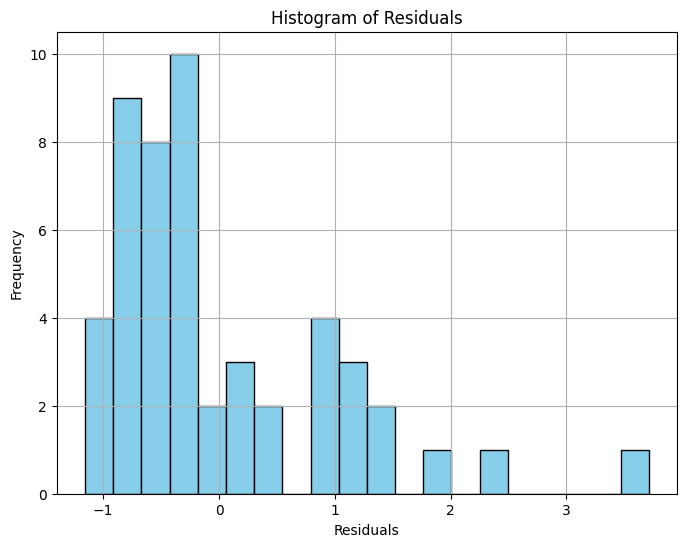

In [ ]:
# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(results['Std_res'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

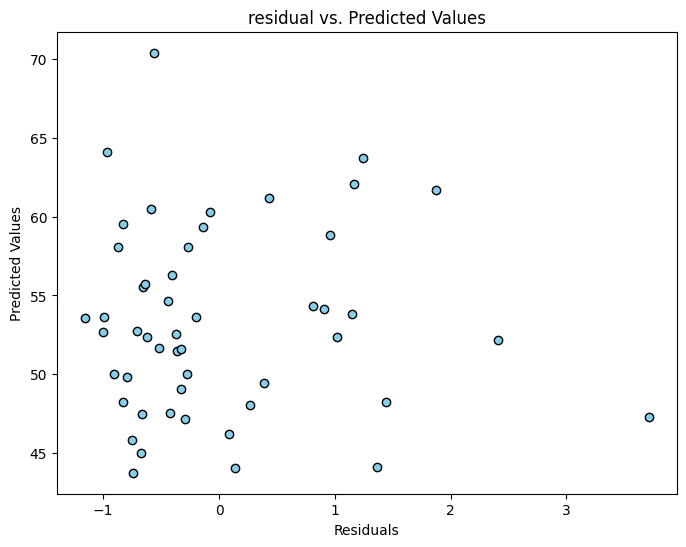

In [ ]:
# Plot the scatterplot of observed vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(results['Std_res'], predicted_values, color='skyblue', edgecolor='black')
#plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('residual vs. Predicted Values')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.show()

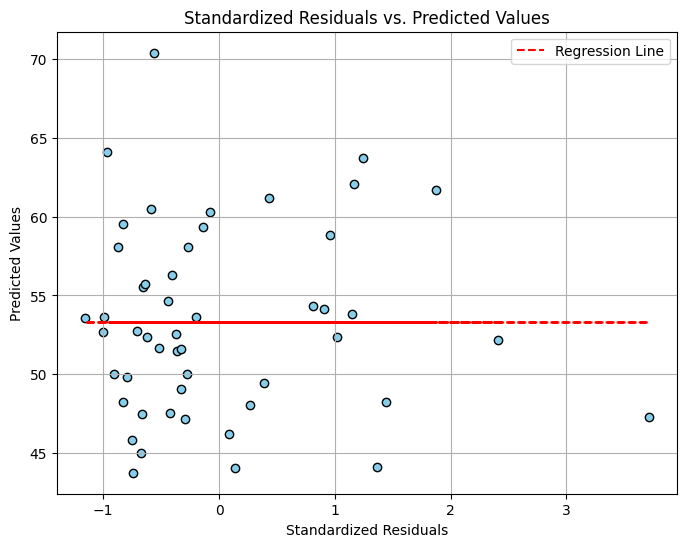

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming results['Std_res'] contains standardized residuals
# and predicted_values contains the predicted values
x = results['Std_res']
y = predicted_values

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the scatterplot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black')
plt.plot(x, regression_line, color='red', linestyle='--', label='Regression Line')

plt.title('Standardized Residuals vs. Predicted Values')
plt.xlabel('Standardized Residuals')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# 9. Select a different explanatory variable and use that variable in a Simple Linear Regression model to predict Y, HOUSEHOLDINCOME. Call this Model 2.  Report and interpret the results of Model 2.  Which is the better model, Model 1 or Model 2?  Give evidence to justify your answer.

In [ ]:
data.select_dtypes(include=['int','float']).corr()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,HeavyDrinkers,TwoParents,Insured
Population,1.000000,0.073738,-0.415579,0.140484,-0.298556,-0.098948,-0.126101,-0.030975,-0.145244,-0.225785
HouseholdIncome,0.073738,1.000000,0.430845,0.685591,-0.637522,0.440417,-0.649112,0.373014,0.477644,0.549679
HighSchool,-0.415579,0.430845,1.000000,0.480685,-0.150125,0.382559,-0.301334,0.386470,0.697022,0.751874
College,0.140484,0.685591,0.480685,1.000000,-0.485522,0.267362,-0.519045,0.264925,0.365850,0.697235
Smokers,-0.298556,-0.637522,-0.150125,-0.485522,1.000000,-0.590243,0.814867,-0.390434,-0.475431,-0.272492
PhysicalActivity,-0.098948,0.440417,0.382559,0.267362,-0.590243,1.000000,-0.780685,0.664022,0.495817,0.297089
Obese,-0.126101,-0.649112,-0.301334,-0.519045,0.814867,-0.780685,1.000000,-0.555064,-0.459993,-0.351116
HeavyDrinkers,-0.030975,0.373014,0.386470,0.264925,-0.390434,0.664022,-0.555064,1.000000,0.304604,0.331003
TwoParents,-0.145244,0.477644,0.697022,0.365850,-0.475431,0.495817,-0.459993,0.304604,1.000000,0.449379
Insured,-0.225785,0.549679,0.751874,0.697235,-0.272492,0.297089,-0.351116,0.331003,0.449379,1.000000


In [ ]:
# Get the list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_variables = pd.get_dummies(data[categorical_columns]).astype(int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_variables], axis=1)

# Drop the original categorical columns
data.drop(columns=categorical_columns, inplace=True)

In [ ]:
data.columns

Index(['Population', 'HouseholdIncome', 'HighSchool', 'College', 'Smokers',
       'PhysicalActivity', 'Obese', 'HeavyDrinkers', 'TwoParents', 'Insured',
       'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine',
       'State_Maryland', 'State_Massachusetts', 'State_Michigan',
       'State_Minnesota', 'State_Mississippi', 'State_Missouri',
       'State_Montana', 'State_Nebraska', 'State_Nevada',
       'State_New Hampshire', 'State_New Jersey', 'State_New Mexico',
       'State_New York', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
  

In [ ]:
# Define the predictor variables (X) and the response variable (Y)
X = data['Obese']  # Add all your predictor variables here
Y = data['HouseholdIncome']  # Response variable
                                                             #I want to start with it because it has the highest correlation with the target variable that i have assumed
# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.95
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.42e-07
Time:                        04:50:15   Log-Likelihood:                -164.88
No. Observations:                  50   AIC:                             333.8
Df Residuals:                      48   BIC:                             337.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4449      8.201     12.370      0.0

# 10. For this last task, you are welcome to fit any Simple Linear Regression model that you wish on the US States data.  You’ll need to decide on the response variable as well as the explanatory variable.  Call this Model 3.  Report and interpret the results of Model 3.


In [ ]:
df

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,30.7,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,33.1,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,20.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,21.7,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,37.7,6.4,65.3,79.7
5,Colorado,W,5.356,58.433,89.5,37.0,17.7,60.4,21.3,15.8,6.7,69.9,80.0
6,Connecticut,NE,3.597,69.461,91.0,39.8,15.5,50.9,25.0,22.1,6.3,67.0,87.7
7,Delaware,NE,0.936,59.878,86.9,31.7,19.6,49.7,31.1,30.0,6.6,60.4,85.7
8,Florida,S,19.893,46.956,87.1,26.5,16.8,50.2,26.4,23.7,7.2,60.2,70.9
9,Georgia,S,10.097,49.179,85.3,29.0,18.8,50.8,30.3,39.4,4.7,60.3,72.7


In [ ]:
# Define the predictor variables (X) and the response variable (Y)
X = data['Smokers']  # Add all your predictor variables here
Y = data['Obese']  # Response variable
                                                             #I want to start with it because it has the highest correlation with the target variable that i have assumed
# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     94.86
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           5.96e-13
Time:                        04:50:15   Log-Likelihood:                -103.91
No. Observations:                  50   AIC:                             211.8
Df Residuals:                      48   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7133      1.570      8.732      0.0

In [ ]:
data_copy = df.copy()

In [ ]:
df.select_dtypes(include =['int','float']).corr()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
Population,1.000000,0.073738,-0.415579,0.140484,-0.298556,-0.098948,-0.126101,0.270903,-0.030975,-0.145244,-0.225785
HouseholdIncome,0.073738,1.000000,0.430845,0.685591,-0.637522,0.440417,-0.649112,0.252942,0.373014,0.477644,0.549679
HighSchool,-0.415579,0.430845,1.000000,0.480685,-0.150125,0.382559,-0.301334,-0.361482,0.386470,0.697022,0.751874
College,0.140484,0.685591,0.480685,1.000000,-0.485522,0.267362,-0.519045,-0.057218,0.264925,0.365850,0.697235
Smokers,-0.298556,-0.637522,-0.150125,-0.485522,1.000000,-0.590243,0.814867,-0.155120,-0.390434,-0.475431,-0.272492
PhysicalActivity,-0.098948,0.440417,0.382559,0.267362,-0.590243,1.000000,-0.780685,-0.079207,0.664022,0.495817,0.297089
Obese,-0.126101,-0.649112,-0.301334,-0.519045,0.814867,-0.780685,1.000000,-0.106161,-0.555064,-0.459993,-0.351116
NonWhite,0.270903,0.252942,-0.361482,-0.057218,-0.155120,-0.079207,-0.106161,1.000000,-0.066592,-0.383024,-0.110736
HeavyDrinkers,-0.030975,0.373014,0.386470,0.264925,-0.390434,0.664022,-0.555064,-0.066592,1.000000,0.304604,0.331003
TwoParents,-0.145244,0.477644,0.697022,0.365850,-0.475431,0.495817,-0.459993,-0.383024,0.304604,1.000000,0.449379


In [ ]:
data_copy.select_dtypes(include =['int','float']).corr()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
Population,1.000000,0.073738,-0.415579,0.140484,-0.298556,-0.098948,-0.126101,0.270903,-0.030975,-0.145244,-0.225785
HouseholdIncome,0.073738,1.000000,0.430845,0.685591,-0.637522,0.440417,-0.649112,0.252942,0.373014,0.477644,0.549679
HighSchool,-0.415579,0.430845,1.000000,0.480685,-0.150125,0.382559,-0.301334,-0.361482,0.386470,0.697022,0.751874
College,0.140484,0.685591,0.480685,1.000000,-0.485522,0.267362,-0.519045,-0.057218,0.264925,0.365850,0.697235
Smokers,-0.298556,-0.637522,-0.150125,-0.485522,1.000000,-0.590243,0.814867,-0.155120,-0.390434,-0.475431,-0.272492
PhysicalActivity,-0.098948,0.440417,0.382559,0.267362,-0.590243,1.000000,-0.780685,-0.079207,0.664022,0.495817,0.297089
Obese,-0.126101,-0.649112,-0.301334,-0.519045,0.814867,-0.780685,1.000000,-0.106161,-0.555064,-0.459993,-0.351116
NonWhite,0.270903,0.252942,-0.361482,-0.057218,-0.155120,-0.079207,-0.106161,1.000000,-0.066592,-0.383024,-0.110736
HeavyDrinkers,-0.030975,0.373014,0.386470,0.264925,-0.390434,0.664022,-0.555064,-0.066592,1.000000,0.304604,0.331003
TwoParents,-0.145244,0.477644,0.697022,0.365850,-0.475431,0.495817,-0.459993,-0.383024,0.304604,1.000000,0.449379


In [ ]:
data_copy.drop(columns = ['NonWhite'],inplace = True)  #not a strong correlation with household income

In [ ]:
data_copy.drop(columns = ['State'],inplace = True)

In [ ]:


# Define the predictor variables (X) and the response variable (Y)
X = data_copy['PhysicalActivity']  # Add all your predictor variables here
Y = data_copy['Obese']  # Response variable

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Print the regression equation
print("Regression Equation:")
print(f"Y = {model.params['PhysicalActivity']:.2f} * X + {model.params['const']:.2f} ")


                            OLS Regression Results                            
Dep. Variable:                  Obese   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     74.91
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.30e-11
Time:                        04:50:16   Log-Likelihood:                -107.67
No. Observations:                  50   AIC:                             219.3
Df Residuals:                      48   BIC:                             223.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.9868      2.815  

In [ ]:
# Extract the required features from the dataset
density = data_copy['PhysicalActivity']
actual_values = df['Obese']

# Coefficients from the provided regression equation
b0 = 52.99
b1 = -0.48

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1*density

# Calculate the residuals
residuals = actual_values - predicted_values

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals})

# Print the actual, predicted, and residual values
print("Actual vs Predicted:")
print(results)

Actual vs Predicted:
    Actual  Predicted  Residual
0     32.4     31.198     1.202
1     28.4     26.446     1.954
2     26.8     28.078    -1.278
3     34.6     33.214     1.386
4     24.1     25.966    -1.866
5     21.3     23.998    -2.698
6     25.0     28.558    -3.558
7     31.1     29.134     1.966
8     26.4     28.894    -2.494
9     30.3     28.606     1.694
10    21.8     24.094    -2.294
11    29.6     27.118     2.482
12    29.4     27.838     1.562
13    31.8     31.822    -0.022
14    31.3     30.430     0.870
15    30.0     29.422     0.578
16    33.2     30.910     2.290
17    33.1     31.294     1.806
18    28.9     27.262     1.638
19    28.3     29.662    -1.362
20    23.6     26.830    -3.230
21    31.5     27.502     3.998
22    25.5     27.694    -2.194
23    35.1     35.038     0.062
24    30.4     29.614     0.786
25    24.6     25.246    -0.646
26    29.6     28.942     0.658
27    26.2     27.262    -1.062
28    26.7     26.398     0.302
29    26.3     28.7

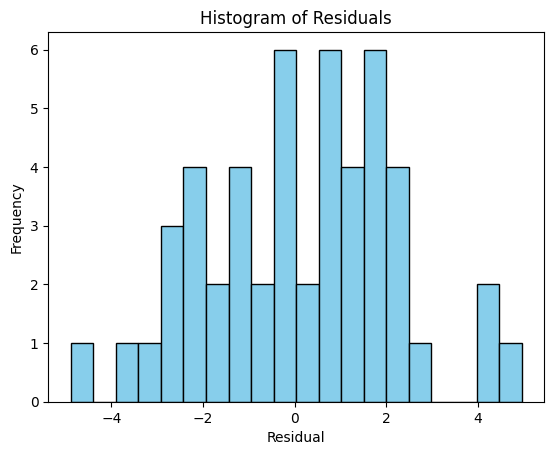

In [ ]:
# Plot histogram of residuals
plt.hist(results['Residual'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

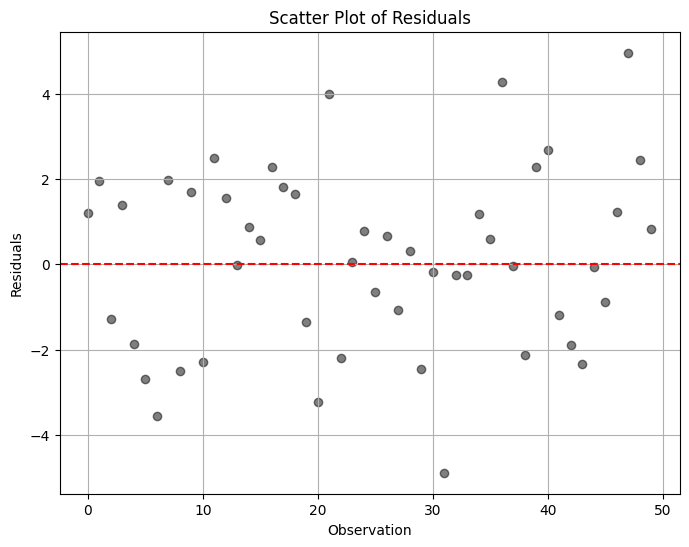

In [ ]:
# Create a scatter plot of residuals
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(range(len(residuals)), results['Residual'], color='black', alpha=0.5)  # Plot residuals
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Scatter Plot of Residuals')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
# Get the list of categorical columns
categorical_columns = data_copy.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_variables = pd.get_dummies(data_copy[categorical_columns]).astype(int)

# Concatenate the dummy variables with the original DataFrame
data_copy = pd.concat([data_copy, dummy_variables], axis=1)

# Drop the original categorical columns
data_copy.drop(columns=categorical_columns, inplace=True)

In [ ]:
data_copy.select_dtypes(include =['int','float']).corr()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,HeavyDrinkers,TwoParents,Insured,Region_MW,Region_NE,Region_S,Region_W
Population,1.000000,0.073738,-0.415579,0.140484,-0.298556,-0.098948,-0.126101,-0.030975,-0.145244,-0.225785,-0.068095,-0.047327,0.161370,-0.048579
HouseholdIncome,0.073738,1.000000,0.430845,0.685591,-0.637522,0.440417,-0.649112,0.373014,0.477644,0.549679,-0.159976,0.503929,-0.482491,0.166557
HighSchool,-0.415579,0.430845,1.000000,0.480685,-0.150125,0.382559,-0.301334,0.386470,0.697022,0.751874,0.285206,0.274372,-0.515269,-0.029054
College,0.140484,0.685591,0.480685,1.000000,-0.485522,0.267362,-0.519045,0.264925,0.365850,0.697235,0.091760,0.629586,-0.403788,-0.282553
Smokers,-0.298556,-0.637522,-0.150125,-0.485522,1.000000,-0.590243,0.814867,-0.390434,-0.475431,-0.272492,0.231294,-0.286218,0.427394,-0.388383
PhysicalActivity,-0.098948,0.440417,0.382559,0.267362,-0.590243,1.000000,-0.780685,0.664022,0.495817,0.297089,-0.120731,0.071930,-0.572155,0.624955
Obese,-0.126101,-0.649112,-0.301334,-0.519045,0.814867,-0.780685,1.000000,-0.555064,-0.459993,-0.351116,0.271245,-0.276850,0.525512,-0.535300
HeavyDrinkers,-0.030975,0.373014,0.386470,0.264925,-0.390434,0.664022,-0.555064,1.000000,0.304604,0.331003,0.054944,0.120091,-0.521141,0.352783
TwoParents,-0.145244,0.477644,0.697022,0.365850,-0.475431,0.495817,-0.459993,0.304604,1.000000,0.449379,0.240399,-0.015695,-0.555942,0.330366
Insured,-0.225785,0.549679,0.751874,0.697235,-0.272492,0.297089,-0.351116,0.331003,0.449379,1.000000,0.313337,0.501298,-0.575301,-0.211462


In [ ]:


# Define the predictor variables (X) and the response variable (Y)
X = data_copy[['Region_MW','Region_NE','Region_S','Region_W']]  # Add all your predictor variables here
Y = data_copy['Insured']  # Response variable

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

# # Print the regression equation
# print("Regression Equation:")
# print(f"Y = {model.params['Region_MW','Region_NE','Region_S','Region_W']:.2f} * X + {model.params['const']:.2f} ")


                            OLS Regression Results                            
Dep. Variable:                Insured   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     18.49
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           5.17e-08
Time:                        04:50:16   Log-Likelihood:                -135.85
No. Observations:                  50   AIC:                             279.7
Df Residuals:                      46   BIC:                             287.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2764      0.433    148.420      0.0

In [ ]:
df

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,30.7,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,33.1,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,20.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,21.7,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,37.7,6.4,65.3,79.7
5,Colorado,W,5.356,58.433,89.5,37.0,17.7,60.4,21.3,15.8,6.7,69.9,80.0
6,Connecticut,NE,3.597,69.461,91.0,39.8,15.5,50.9,25.0,22.1,6.3,67.0,87.7
7,Delaware,NE,0.936,59.878,86.9,31.7,19.6,49.7,31.1,30.0,6.6,60.4,85.7
8,Florida,S,19.893,46.956,87.1,26.5,16.8,50.2,26.4,23.7,7.2,60.2,70.9
9,Georgia,S,10.097,49.179,85.3,29.0,18.8,50.8,30.3,39.4,4.7,60.3,72.7


# Chi-square test using contigency table(Example)

In [ ]:
from scipy.stats import chi2_contingency,chi2

def chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

In [ ]:
# Generate a dataset with two categorical variables: "Education Level" and "Employment Status"
# np.random.seed(0)
# education_levels = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=100)
# employment_status = np.random.choice(['Employed', 'Unemployed', 'Student'], size=100)

data1 = pd.DataFrame({
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD', 'PhD' , 'Bachelor','High School', 'Master','PhD', 'Bachelor', 'HighSchool']*20,
    'Employment_Status': ['UE','E','E','UE','E','E','E','UE','E','UE','E']*20
})

# Calculate critical value for chi-square distribution
alpha = 0.05  # Significance level
critical_value = chi2.ppf(1 - alpha, 2)
print("Critical value of chi-square:", critical_value)

chi_square_test(data1,'Education_Level', 'Employment_Status')

Critical value of chi-square: 5.991464547107979


(18.333333333333336, 0.0010620521289556695)

In [ ]:
import plotly.graph_objs as go
import numpy as np

# Generate random data for demonstration
np.random.seed(0)
num_samples = 100
num_predictors = 10

# Generate random predictor variables
predictors = np.random.randn(num_samples, num_predictors)

# Generate random target variable
target = np.sum(predictors, axis=1) + np.random.randn(num_samples)

# Fit multiple linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(predictors, target)

# Create 3D scatter plot
trace = go.Scatter3d(
    x=predictors[:, 0],
    y=predictors[:, 1],
    z=predictors[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=target,
        colorscale='Viridis',
        opacity=0.8
    )
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Predictor 1'),
        yaxis=dict(title='Predictor 2'),
        zaxis=dict(title='Predictor 3')
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(title='Multiple Linear Regression: 3D Scatter Plot')
fig.show()


In [ ]:
# Fit the ANOVA model
model = ols('HouseholdIncome ~ College', data=df[["College","HouseholdIncome"]]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq    df          F        PR(>F)
College   1739.358780   1.0  42.572008  3.941054e-08
Residual  1961.129512  48.0        NaN           NaN
